# Structure-Preserving Color Normalization and Sparse Stain Separation for Histological Images (Vahadane)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
import utils
import vahadane as vhd

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
SOURCE_PATH = './data/i9*64.png'
TARGET_PATH = './data/i1.png'
RESULT_PATH = './output/i9*64_to_i1_normal.png'

## Load source and target images

source image size:  (8602, 11469, 3)
target image size:  (1536, 2048, 3)


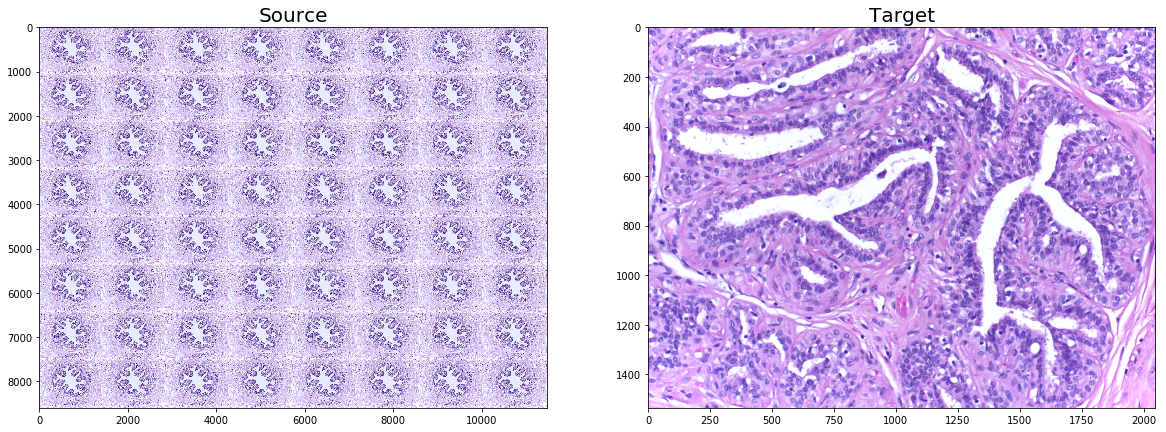

In [3]:
source_image = utils.read_image(SOURCE_PATH)
target_image = utils.read_image(TARGET_PATH)
print('source image size: ', source_image.shape)
print('target image size: ', target_image.shape)
plt.figure(figsize=(20.0, 20.0))
plt.subplot(1, 2, 1)
plt.title('Source', fontsize=20)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.title('Target', fontsize=20)
plt.imshow(target_image)
plt.savefig(RESULT_PATH)
plt.show()

## Configuration

In [4]:
vhd.show_config()

STAIN_NUM = 2
THRESH = 0.9
LAMBDA1 = 0.02
LAMBDA2 = 0.02
ITER = 100
sep_mode = 0
getH_mode = 0


## Stain Separation and Color Normalization

In [5]:
Ws, Hs = vhd.stain_separate(source_image)
Wt, Ht = vhd.stain_separate(target_image)

[[0.12072855 0.11191792 0.10754154 ... 0.34276651 0.19415601 0.11631353]
 [0.29423947 0.28899012 0.27857336 ... 0.52398371 0.35387774 0.31015493]
 [0.03593201 0.04000533 0.05646661 ... 0.17062552 0.03187521 0.        ]] [[0.60074993 0.37834061]
 [0.74471844 0.91766517]
 [0.29067846 0.12144552]]
SNMF time: 81.13628816604614 s
[[0.         0.         0.         ... 0.         0.04409532 0.05232582]
 [0.04000533 0.04409532 0.06062462 ... 0.32632779 0.31015493 0.29423947]
 [0.         0.         0.         ... 0.         0.         0.        ]] [[0.5683288  0.24182674]
 [0.79687867 0.96164632]
 [0.20490669 0.1294457 ]]
SNMF time: 1.3483400344848633 s


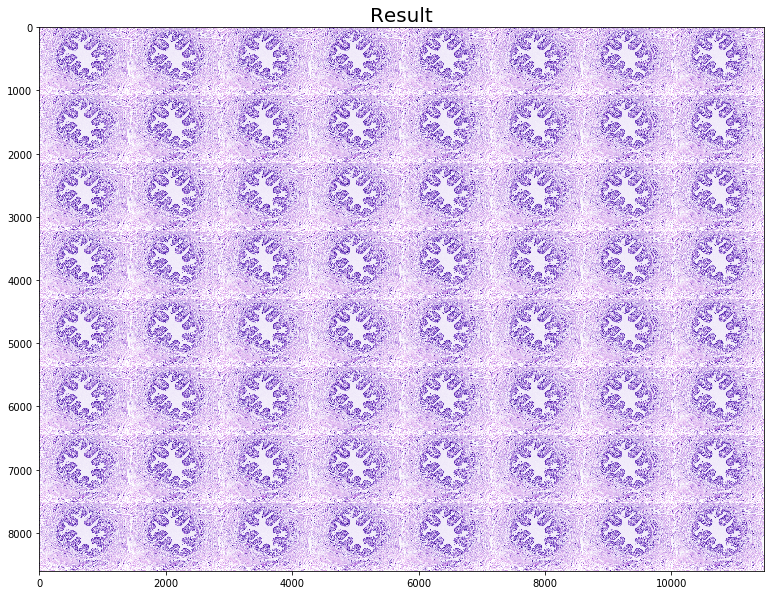

True

In [6]:
img = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.title('Result', fontsize=20)
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(RESULT_PATH, img)